# Working with [Audio](https://docs.activeloop.ai/en/latest/concepts/features.html#audio)

In this notebook, we will see how to handle audio data.

In [ ]:
# first we install hub
# runtime enviroment

!pip install hub

**Note**: Restart the colab runtime as few packages has been updated or you may get error (<font color="red">FileNotFoundError</font>)

In [14]:
from hub.schema import Primitive, Audio, ClassLabel
from hub import transform, schema

import librosa
from librosa import display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from glob import glob
from time import time

plt.style.use("ggplot")
%matplotlib inline

Text(0.5, 0, 'Amplitude')

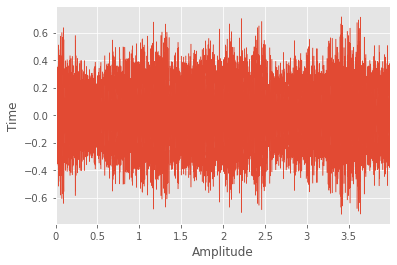

In [17]:
fnames = glob("./Data/audio/*")

# lets look at an audio file
audio, sr = librosa.load(fnames[0])
librosa.display.waveplot(audio, sr=sr)
plt.ylabel("Time")
plt.xlabel("Amplitude")

## (A) Defining a Schema for Audio Files
A schema is a python `dict` that contains metadata about our dataset. 

For this example, we tell Hub that our audio files have variable shape, perhaps as long as 192,000 samples. 

In [4]:
my_schema = {
    "wav": Audio(shape=(None,), max_shape=(192000,), file_format="wav"),
    "sampling_rate": Primitive(dtype=int),    
}

## (B) Defining Transforms
First, we define a method `load_transform` and decorate it with `@transform`. This is the function that will applied to **each instance/sample** of our dataset. 

In our example, for each element in the list `fnames`, we want to read the wav file into memory (with `librosa.load`).

In [5]:
@transform(schema=my_schema)
def load_transform(sample):
    
    audio, sr = librosa.load(sample, sr=None)
    
    return {
        "wav": audio,
        "sampling_rate": sr
    }

In [6]:
ds = load_transform(fnames) # returns a transform object
type(ds)

hub.compute.transform.Transform

## (C) Finally, Execution!
Hub lazily executes, so nothing happens until we invoke `store`. By invoking `store`, we apply `load_transform` to our dataset and push everything.

In [7]:
start = time()

tag = "mynameisvinn/vibrations"
ds2 = ds.store(tag)
type(ds2)

end = time()
print("Elapsed time:", end - start)

/Users/mynameisvinn/anaconda3/lib/python3.8/site-packages/zarr/creation.py:210: UserWarning: ignoring keyword argument 'mode'
  warn('ignoring keyword argument %r' % k)
Computing the transormation: 100%|██████████| 14.0/14.0 [00:01<00:00, 13.5 items/s]

Elapsed time: 5.174474000930786
